**Business Risk Measurement**

Business risk represents external and internal factors that may lead a company to a reduction of profits or even bankruptcy.

To standardise business risk metrics and enable comparison across firms of different sizes, we can use the coefficient of variation. The coefficient of variation is computed by dividing standard deviation by the mean.

Below is an example on how can we calculate the coefficient of variation for sales:

Revenues Coefficient of Variation = Standard Deviation Revenues / Revenues Mean

By using the coefficient of variation instead of the standard deviation, we can compare business risk across firms of different sizes.

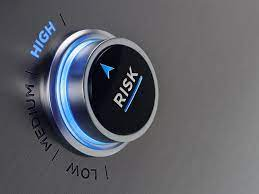

**Importing libraries**

In [ ]:
import requests
import numpy

**Web Scraping API Key**

we will use an API, financialmodelingprep. It offers around 200 free API calls per day upon registration. With this API, we can extract company revenues, operating income and net income for the last years.

To extract each company metrics, we simply pass the company ticker to the url as per below. 

In [ ]:
demo = 'c9d6dc095a11a670bfad86183c30ae19'
stocks = ['AAPL','MSFT','GOOG']

**Final Code**

To keep things simple, we will only calculate business risk based on sales, operating income and net income. And we will use the coefficient of variation for that purpose.

We will start with a list of 3 stocks, Apple, Microsoft and Google. Then we will compare business risk across them. 
Then, we append the extracted values into a list. Each of the list will contain the latest 5 year company revenues, operating income and net income.

In [ ]:
for stock in stocks:
  income_statement = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={demo}').json()

  number_of_years = 0

  revenues = []
  operating_income = []
  net_income = []

  for item in income_statement:
    if number_of_years < 5:
      revenues.append(income_statement[number_of_years]['revenue'])
      operating_income.append(income_statement[number_of_years]['operatingIncome'])
      net_income.append(income_statement[number_of_years]['netIncome'])
      number_of_years += 1
  print('REVENUES',revenues)
  print('OPERATING INCOME',operating_income)
  print('NET INCOME',net_income)
  print(stock)
  revenues_array = numpy.array(revenues)
  operating_income_array = numpy.array(operating_income)
  net_income_array = numpy.array(net_income)
  CV_Sales = revenues_array.std() / revenues_array.mean()
  print('Revenue Coefficient of Variation for '+ stock + ' is ' + str(round(CV_Sales,2)))
  CV_OI = operating_income_array.std() / operating_income_array.mean()
  print('Operating Income Coefficient of Variation for '+ stock + ' is ' + str(round(CV_OI,2)))
  CV_Net_Income = net_income_array.std() / net_income_array.mean()
  print('Net Income Coefficient of Variation for '+ stock + ' is ' + str(round(CV_Net_Income,2)) +'\n')




REVENUES [274515000000, 260174000000, 265595000000, 229234000000, 215639000000]
OPERATING INCOME [66288000000, 63930000000, 70898000000, 61344000000, 60024000000]
NET INCOME [57411000000, 55256000000, 59531000000, 48351000000, 45687000000]
AAPL
Revenue Coefficient of Variation for AAPL is 0.09
Operating Income Coefficient of Variation for AAPL is 0.06
Net Income Coefficient of Variation for AAPL is 0.1

REVENUES [143015000000, 125843000000, 110360000000, 89950000000, 85320000000]
OPERATING INCOME [52959000000, 42959000000, 35058000000, 22632000000, 21292000000]
NET INCOME [44281000000, 39240000000, 16571000000, 21204000000, 16798000000]
MSFT
Revenue Coefficient of Variation for MSFT is 0.2
Operating Income Coefficient of Variation for MSFT is 0.34
Net Income Coefficient of Variation for MSFT is 0.43

REVENUES [182527000000, 161857000000, 136819000000, 110855000000, 90272000000]
OPERATING INCOME [41224000000, 34231000000, 27524000000, 26178000000, 23716000000]
NET INCOME [40269000000, 3

**Observation from output**

By taking revenue, operating income and net income as proxy to measure business risk, and based on the last 5 years data, we can see that Apple is by far the company with the lower business risk. It has a variation of around 0.09

On the other side, Google has a much higher business risk with a sales variation coefficient of 0.24. The other two metrics, operating income and net income, seems to support this finding as well.

To complement the analysis, we could calculate the variation for some other financials. For instance, account receivables or company debt.

As an important note, keep in mind that past variation may not always be a good indication for future variation. There may be significant and unexpected events happening in the future which may impact company financials